In [21]:

import tensorflow as tf
print(tf.__version__)

2.4.0


In [1]:
pip install opencv-python==4.4.0.46 opencv-contrib-python==4.4.0.40

     |████████████████████████████████| 49.5MB 65kB/s 
     |████████████████████████████████| 55.6MB 58kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
file_id="1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-"
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-
To: /content/datasetProjetS5_2020.zip
864MB [00:06, 135MB/s]


In [3]:
!unzip -q datasetProjetS5_2020.zip

In [4]:
rm -r ./datasetProjetS5_2020/train/Background_without_leaves/

In [5]:
rm -r ./datasetProjetS5_2020/test/Background_without_leaves/

In [6]:
rm -r ./datasetProjetS5_2020/valid/Background_without_leaves/

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers as optimizers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [8]:
image_size=256
# Initialise le modele VGG16
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
# desactive le train de toutes les couches
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Vérifie le status trainable de chaque couche individuelle
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
# Crée le modele
model = Sequential()

# Ajout de la couche préinitialisé au model
model.add(vgg_conv)

# Ajout des autres couches final pour diminuer le nombre de choix et le temps de calcul
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Afficher un résumé sur le modele. Vérifier le nombre de param trainable
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3f12ad1208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f00b80668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f0035a400> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3f003079e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f0030ea90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f003148d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3f00314358> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f0031cd30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ef009af60> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ef009aba8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ef009e320> Fals

In [9]:
# Charge les images normalisées
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Change le batchsize celon la capacité de la RAM
train_batchsize = 100
val_batchsize = 10

# Charge les images pour le train
train_generator = train_datagen.flow_from_directory(
        "./datasetProjetS5_2020/train",
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Charge les images pour le test
test_generator = test_datagen.flow_from_directory(
        "./datasetProjetS5_2020/test",
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 35249 images belonging to 38 classes.
Found 10770 images belonging to 38 classes.


In [10]:

# Compile et Configure le modele pour le training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Entraine le modele
hist = model.fit(
      train_generator,
      steps_per_epoch=
         train_generator.samples/train_generator.batch_size,
      epochs=17,
      validation_data=test_generator, 
      validation_steps=
         test_generator.samples/test_generator.batch_size,
      verbose=1)

Epoch 1/17
352/352 [==============================] - 258s 701ms/step - loss: 1.5740 - acc: 0.6086 - val_loss: 0.3502 - val_acc: 0.8925
Epoch 2/17
352/352 [==============================] - 260s 737ms/step - loss: 0.3573 - acc: 0.8869 - val_loss: 0.2596 - val_acc: 0.9216
Epoch 3/17
352/352 [==============================] - 260s 739ms/step - loss: 0.2258 - acc: 0.9277 - val_loss: 0.1782 - val_acc: 0.9433
Epoch 4/17
352/352 [==============================] - 261s 740ms/step - loss: 0.1686 - acc: 0.9468 - val_loss: 0.1996 - val_acc: 0.9374
Epoch 5/17
352/352 [==============================] - 260s 739ms/step - loss: 0.1278 - acc: 0.9583 - val_loss: 0.1722 - val_acc: 0.9422
Epoch 6/17
352/352 [==============================] - 260s 738ms/step - loss: 0.1044 - acc: 0.9651 - val_loss: 0.1299 - val_acc: 0.9579
Epoch 7/17
352/352 [==============================] - 261s 739ms/step - loss: 0.0818 - acc: 0.9726 - val_loss: 0.1212 - val_acc: 0.9607
Epoch 8/17
352/352 [============================

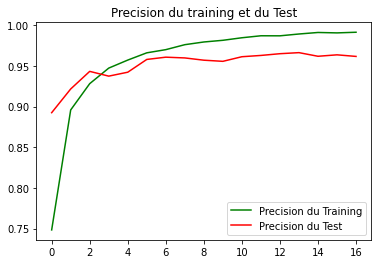

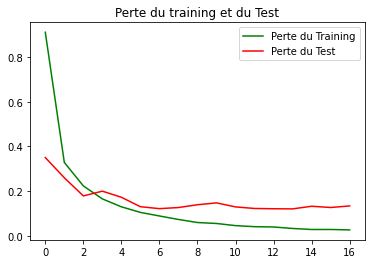

In [11]:

# fonction pour afficher la courbe du resultat du modele
def histogram_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'g', label='Precision du Training')
    plt.plot(epochs, val_acc, 'r', label='Precision du Test')
    plt.title('Precision du training et du Test')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'g', label='Perte du Training')
    plt.plot(epochs, val_loss, 'r', label='Perte du Test')
    plt.title('Perte du training et du Test')
    plt.legend()

    plt.show()


# Lancemant de la fonction d'affichage de la courbe
histogram_results(hist)

In [12]:
# Fonction pour le calcul des erreurs et de la liste des classes
def acc(test_generator, predictions):
    ground_truth = test_generator.classes

    label2index = test_generator.class_indices

    idx2label = list(label2index.keys())

    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print("Nombre d'erreurs = {}/{}".format(len(errors),test_generator.samples))
    print("Score = {}%".format((1- len(errors)/test_generator.samples)*100))


In [13]:

# Calcule les prediction depuis le model en utilisant le generateur
predictions = model.predict(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)

# Lancemant de la fonction pour avoir la liste des classes et des erreurs
acc(test_generator, predictions)


1077/1077 [==============================] - 71s 66ms/step
Nombre d'erreurs = 413/10770
Score = 96.1652739090065%


In [14]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples//test_generator.batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [15]:
test_acc

0.9616527557373047

In [16]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
def f(path):
  img = load_img(path)  # Charger l'image
  img = img_to_array(img)  # Convertir en tableau numpy
  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
  img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
  y = model.predict(img)  # Prédir la classe de l'image (parmi les 38 classes d'ImageNet)
  # from keras.applications.vgg16 import decode_predictions
  # print('Top 3 :', decode_predictions(y, model,top=3)[0])
  prediction = np.argmax(y[0])
  #on a la prédiction c'est un indexe on doit extrait la liste des label utilisant os 
  ldir=os.listdir('./datasetProjetS5_2020/valid')
  #os extrait les noms de fichier non triée on utilise la méthode sort pour les triée 
  ldir.sort()
  #Affichage de notre prédiction 
  print (ldir[prediction])

In [17]:

f('./datasetProjetS5_2020/valid/Blueberry___healthy/image (961).JPG')


Blueberry___healthy


In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from google.colab import files
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>